In [1]:
# !pip install seaborn pandas matplotlib numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
# Alternative to set svg for newer versions
# import matplotlib_inline
# matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [ ]:
#在表格中添加了num

In [2]:
data=pd.read_csv('nacc_04252020.csv',low_memory=False)

In [3]:
data.shape

(25368, 998)

In [4]:
print(data.columns)


Index(['num', 'NACCID', 'NACCADC', 'PACKET', 'FORMVER', 'VISITMO', 'VISITDAY',
       'VISITYR', 'NACCVNUM', 'NACCAVST',
       ...
       'NPCPRION', 'NPPOTH1', 'NPCOTH1', 'NPOTH1X', 'NPPOTH2', 'NPCOTH2',
       'NPOTH2X', 'NPPOTH3', 'NPCOTH3', 'NPOTH3X'],
      dtype='object', length=998)


In [5]:
import pandas as pd

# 假设您的数据集data包含名为'NACCID'的列，其形式为'NACC998980'
# 假设data的形状为 (num_samples, num_features)

# 使用 Pandas 读取数据
# data = pd.read_csv('your_data.csv')

# 定义一个函数用于处理单个字符串
def process_string(s):
    numeric_part = s.replace('NACC', '')
    numeric_part_padded = numeric_part.zfill(10)
    return numeric_part_padded

# 将处理函数应用于整个列，并将结果转换为整数类型
data['NACCID'] = data['NACCID'].apply(process_string).astype(int)

# 输出转换后的数据集
print(data['NACCID'])


0         67187
1         67187
2         67187
3        673351
4        673351
          ...  
25363    992483
25364    992483
25365    992483
25366    992483
25367    992483
Name: NACCID, Length: 25368, dtype: int32


In [6]:
data.head()

,num,NACCID,NACCADC,PACKET,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,...,NPCPRION,NPPOTH1,NPCOTH1,NPOTH1X,NPPOTH2,NPCOTH2,NPOTH2X,NPPOTH3,NPCOTH3,NPOTH3X
0,NaN,67187,289,I,2,11,28,2011,1,3,...,-4.0,-4.0,-4.0,NaN,-4.0,-4.0,NaN,-4.0,-4.0,NaN
1,NaN,67187,289,F,2,4,15,2013,2,3,...,-4.0,-4.0,-4.0,NaN,-4.0,-4.0,NaN,-4.0,-4.0,NaN
2,NaN,67187,289,T,2,5,27,2014,3,3,...,-4.0,-4.0,-4.0,NaN,-4.0,-4.0,NaN,-4.0,-4.0,NaN
3,NaN,673351,289,I,2,6,4,2010,1,7,...,-4.0,-4.0,-4.0,NaN,-4.0,-4.0,NaN,-4.0,-4.0,NaN
4,NaN,673351,289,F,2,4,8,2011,2,7,...,-4.0,-4.0,-4.0,NaN,-4.0,-4.0,NaN,-4.0,-4.0,NaN


In [7]:
#null_sum = data.isnull().sum()
#data.columns[null_sum < len(data)*0.6]

In [8]:
data.dtypes

num        float64
NACCID       int32
NACCADC      int64
PACKET      object
FORMVER      int64
            ...   
NPCOTH2    float64
NPOTH2X     object
NPPOTH3    float64
NPCOTH3    float64
NPOTH3X     object
Length: 998, dtype: object

In [9]:
#data.drop(columns=data.columns[null_sum > len(data) * 0.3], inplace=True)

In [10]:
#字符串
string_columns = data.select_dtypes(include='object').columns


data = data.drop(columns=string_columns)


In [11]:
data.dtypes

num        float64
NACCID       int32
NACCADC      int64
FORMVER      int64
VISITMO      int64
            ...   
NPCOTH1    float64
NPPOTH2    float64
NPCOTH2    float64
NPPOTH3    float64
NPCOTH3    float64
Length: 834, dtype: object

In [12]:
feature_names1 = data.columns.tolist()
print(feature_names1)

['num', 'NACCID', 'NACCADC', 'FORMVER', 'VISITMO', 'VISITDAY', 'VISITYR', 'NACCVNUM', 'NACCAVST', 'NACCNVST', 'NACCDAYS', 'NACCFDYS', 'NACCREAS', 'NACCREFR', 'BIRTHMO', 'BIRTHYR', 'SEX', 'HISPANIC', 'HISPOR', 'RACE', 'RACESEC', 'RACESECX', 'RACETER', 'PRIMLANG', 'EDUC', 'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED', 'INBIRMO', 'INBIRYR', 'INSEX', 'NEWINF', 'INHISP', 'INHISPOR', 'NACCNINR', 'INRACE', 'INRASEC', 'INRATER', 'INEDUC', 'INRELTO', 'INKNOWN', 'INLIVWTH', 'INVISITS', 'INCALLS', 'INRELY', 'NACCFAM', 'NACCMOM', 'NACCDAD', 'NACCAM', 'NACCAMS', 'NACCFM', 'NACCFMS', 'NACCOM', 'NACCOMS', 'NACCFADM', 'NACCFFTD', 'ANYMEDS', 'DRUG37', 'DRUG38', 'DRUG39', 'DRUG40', 'DRUG_ID37', 'DRUG_ID38', 'DRUG_ID39', 'DRUG_ID40', 'TOBAC30', 'TOBAC100', 'SMOKYRS', 'PACKSPER', 'QUITSMOK', 'ALCOCCAS', 'ALCFREQ', 'CVHATT', 'HATTMULT', 'HATTYEAR', 'CVAFIB', 'CVANGIO', 'CVBYPASS', 'CVPACDEF', 'CVPACE', 'CVCHF', 'CVANGINA', 'CVHVALVE', 'CVOTHR', 'CBSTROKE', 'STROKMUL', 'NACCSTYR', 'CBTIA', 'TIAMU

In [13]:
data.describe()

,num,NACCID,NACCADC,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,NACCNVST,...,NPPHIPP,NPCHIPP,NPPPRION,NPCPRION,NPPOTH1,NPCOTH1,NPPOTH2,NPCOTH2,NPPOTH3,NPCOTH3
count,0.0,25368.000000,25368.000000,25368.000000,25368.000000,25368.000000,25368.000000,25368.000000,25368.000000,25368.000000,...,22548.000000,22547.000000,22543.000000,22543.000000,22558.000000,22572.000000,22549.000000,22546.000000,22542.000000,22542.000000
mean,NaN,501018.996846,5882.626419,2.281536,6.408704,15.450686,2013.078327,4.008948,7.017897,6.622911,...,-3.872938,-3.874351,-3.874906,-3.873930,-3.871974,-3.869484,-3.872677,-3.873547,-3.874190,-3.874190
std,NaN,287450.553173,2489.710738,0.633902,3.347465,8.614420,3.751250,2.785133,3.347791,3.432014,...,0.862143,0.854049,0.853610,0.859733,0.860595,0.865546,0.863010,0.859850,0.858861,0.858861
min,NaN,34.000000,289.000000,1.000000,1.000000,1.000000,2005.000000,1.000000,1.000000,1.000000,...,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000
25%,NaN,251952.500000,5452.000000,2.000000,4.000000,8.000000,2010.000000,2.000000,4.000000,4.000000,...,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000
50%,NaN,501700.000000,6499.000000,2.000000,6.000000,15.000000,2013.000000,3.000000,7.000000,6.000000,...,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000
75%,NaN,753613.000000,6518.000000,3.000000,9.000000,23.000000,2016.000000,6.000000,10.000000,9.000000,...,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000
max,NaN,999854.000000,9661.000000,3.000000,12.000000,31.000000,2020.000000,15.000000,15.000000,15.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [14]:
#count：每列的非缺失值数量。
#mean：每列的均值。
#std：每列的标准差。
#min：每列的最小值。
#25%：每列的第一个四分位数（25th percentile）。
#50%：每列的中位数，即第二个四分位数（50th percentile）。
#75%：每列的第三个四分位数（75th percentile）。
#max：每列的最大值。

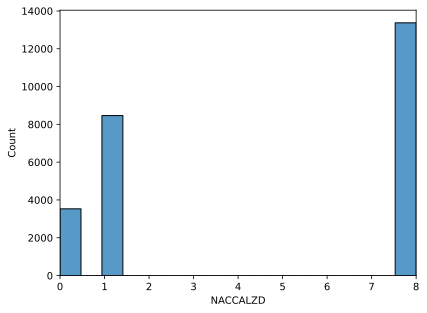

In [15]:
sns.histplot(data['NACCALZD'])
plt.xlim(0,1,9)
plt.xticks(range(0,9))
plt.show()

In [16]:
data['NACCEPMD'].value_counts()[0:20]

 0    25214
 1      128
-4       26
Name: NACCEPMD, dtype: int64

In [17]:
data['RACESEC'].value_counts()[0:20]

88    24463
3       404
1       215
99      199
5        49
2        37
4         1
Name: RACESEC, dtype: int64

In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 假设data是您的数据集
# Min-Max 归一化
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
data_min_max_normalized = min_max_scaler.fit_transform(data)
data_min_max_normalized_df = pd.DataFrame(data_min_max_normalized, columns=data.columns)

# 查看归一化后的前几行数据
print(data_min_max_normalized_df.head())
# Z-Score 归一化
#z_score_scaler = StandardScaler()
#data_z_score_normalized = z_score_scaler.fit_transform(data)


   num    NACCID  NACCADC  FORMVER   VISITMO  VISITDAY   VISITYR  NACCVNUM  \
0  NaN  0.067165      0.0      0.5  0.909091  0.900000  0.400000  0.000000   
1  NaN  0.067165      0.0      0.5  0.272727  0.466667  0.533333  0.071429   
2  NaN  0.067165      0.0      0.5  0.363636  0.866667  0.600000  0.142857   
3  NaN  0.673438      0.0      0.5  0.454545  0.100000  0.333333  0.000000   
4  NaN  0.673438      0.0      0.5  0.272727  0.233333  0.400000  0.071429   

   NACCAVST  NACCNVST  ...  NPPHIPP  NPCHIPP  NPPPRION  NPCPRION  NPPOTH1  \
0  0.142857  0.071429  ...      0.0      0.0       0.0       0.0      0.0   
1  0.142857  0.071429  ...      0.0      0.0       0.0       0.0      0.0   
2  0.142857  0.071429  ...      0.0      0.0       0.0       0.0      0.0   
3  0.428571  0.285714  ...      0.0      0.0       0.0       0.0      0.0   
4  0.428571  0.285714  ...      0.0      0.0       0.0       0.0      0.0   

   NPCOTH1  NPPOTH2  NPCOTH2  NPPOTH3  NPCOTH3  
0      0.0      0.0

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_data.py:479: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [19]:
print(data.columns)


Index(['num', 'NACCID', 'NACCADC', 'FORMVER', 'VISITMO', 'VISITDAY', 'VISITYR',
       'NACCVNUM', 'NACCAVST', 'NACCNVST',
       ...
       'NPPHIPP', 'NPCHIPP', 'NPPPRION', 'NPCPRION', 'NPPOTH1', 'NPCOTH1',
       'NPPOTH2', 'NPCOTH2', 'NPPOTH3', 'NPCOTH3'],
      dtype='object', length=834)


In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GroupKFold, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.preprocessing import MinMaxScaler

# 假设data是您的数据集，包含所有特征，其中NACCALZD作为输出，NACCID是病人ID列
# 假设data的形状为 (num_samples, num_features)

# 划分 x 和 y
x = data.drop(columns=['NACCALZD'])  # x 包含除 NACCALZD 外的所有特征
y = data['NACCALZD']  # y 是 NACCALZD 列

# 删除包含缺失值的列
x = x.dropna(axis=1)

# 将 x 和 y 转换为 NumPy 数组
x = x.values
y = y.values

# 获取病人ID列（NACCID）
naccid_column = data['NACCID']

# 划分训练集和测试集
x_train, x_test, y_train, y_test, naccid_train, naccid_test = train_test_split(x, y, naccid_column, test_size=0.3, random_state=42)

# 数据归一化
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 创建 SVM 分类器
svm_classifier = SVC(kernel='linear', C=1.0, probability=True)

# 使用 GroupKFold 进行交叉验证
group_kfold = GroupKFold(n_splits=5)

# 初始化一个空的列表存放评估指标
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
average_precision_scores = []

for train_index, test_index in group_kfold.split(x_train_scaled, y_train, groups=naccid_train):
    X_train_fold, X_valid_fold = x_train_scaled[train_index], x_train_scaled[test_index]
    y_train_fold, y_valid_fold = y_train[train_index], y_train[test_index]

    # 在训练集的一个折上训练分类器
    svm_classifier.fit(X_train_fold, y_train_fold)

    # 在验证集的一个折上进行预测
    y_pred_valid_prob = svm_classifier.predict_proba(X_valid_fold)

    # Get the predicted class labels
    y_pred_valid = np.argmax(y_pred_valid_prob, axis=1)

    # 计算评估指标
    accuracy_scores.append(accuracy_score(y_valid_fold, y_pred_valid))
    precision_scores.append(precision_score(y_valid_fold, y_pred_valid, average='macro', zero_division=1))
    recall_scores.append(recall_score(y_valid_fold, y_pred_valid, average='macro', zero_division=1))
    f1_scores.append(f1_score(y_valid_fold, y_pred_valid, average='macro'))
    roc_auc_scores.append(roc_auc_score(y_valid_fold, y_pred_valid_prob, average='macro', multi_class='ovr'))
    average_precision_scores.append(average_precision_score(y_valid_fold, y_pred_valid_prob, average='macro'))

# 输出交叉验证评估指标的平均值
print("交叉验证准确率：", np.mean(accuracy_scores))
print("交叉验证精确率：", np.mean(precision_scores))
print("交叉验证召回率：", np.mean(recall_scores))
print("交叉验证F1 Score：", np.mean(f1_scores))
print("交叉验证AUC：", np.mean(roc_auc_scores))
print("交叉验证平均精确率：", np.mean(average_precision_scores))


交叉验证准确率： 0.47457263656221693
交叉验证精确率： 0.75
交叉验证召回率： 0.75
交叉验证F1 Score： 0.5
交叉验证AUC： 1.0
交叉验证平均精确率： 1.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GroupKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

# 假设data是您的数据集，包含所有特征，其中NACCALZD作为输出，NACCID是病人ID列
# 假设data的形状为 (num_samples, num_features)

# 划分 x 和 y
x = data.drop(columns=['NACCALZD'])  # x 包含除 NACCALZD 外的所有特征
y = data['NACCALZD']  # y 是 NACCALZD 列

# 删除包含缺失值的列
x = x.dropna(axis=1)

# 将 x 和 y 转换为 NumPy 数组
x = x.values
y = y.values

# 获取病人ID列（NACCID）
naccid_column = data['NACCID']

# 创建 SVM 分类器
svm_classifier = SVC(kernel='linear', C=1.0)

# 使用 GroupKFold 进行交叉验证
group_kfold = GroupKFold(n_splits=5)

# 初始化一个空的列表存放评估指标
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
average_precision_scores = []

for train_index, test_index in group_kfold.split(x, y, groups=naccid_column):
    X_train, X_valid = x[train_index], x[test_index]
    y_train, y_valid = y[train_index], y[test_index]

    # 数据归一化等预处理步骤...

    # 在训练集的一个折上训练分类器
    svm_classifier.fit(X_train, y_train)

    # 在验证集的一个折上进行预测
    y_pred_valid = svm_classifier.predict(X_valid)

    # 计算评估指标
    accuracy_scores.append(accuracy_score(y_valid, y_pred_valid))
    precision_scores.append(precision_score(y_valid, y_pred_valid))
    recall_scores.append(recall_score(y_valid, y_pred_valid))
    f1_scores.append(f1_score(y_valid, y_pred_valid))
    roc_auc_scores.append(roc_auc_score(y_valid, y_pred_valid))
    average_precision_scores.append(average_precision_score(y_valid, y_pred_valid))

# 输出交叉验证评估指标的平均值
print("交叉验证准确率：", np.mean(accuracy_scores))
print("交叉验证精确率：", np.mean(precision_scores))
print("交叉验证召回率：", np.mean(recall_scores))
print("交叉验证F1 Score：", np.mean(f1_scores))
print("交叉验证AUC：", np.mean(roc_auc_scores))
print("交叉验证平均精确率：", np.mean(average_precision_scores))


In [ ]:
for feature, importance in zip(top_100_feature_names, top_100_feature_importances):
    print(f"{feature}: {importance:.5f}")

In [ ]:
import pandas as pd
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 假设data是您的数据集，包含所有特征，其中NACCALZD作为输出，NACCID作为病人ID
# 假设data的形状为 (num_samples, num_features)

# 划分 x 和 y
x = data.drop(columns=['NACCALZD'])  # x 包含除 NACCALZD 外的所有特征
y = data['NACCALZD']  # y 是 NACCALZD 列

# 删除包含缺失值的列
x = x.dropna(axis=1)

# 将 x 和 y 转换为 NumPy 数组
x = x.values
y = y.values

# 获取 NACCID 列作为病人ID
nacc_ids = data['NACCID'].values

# 创建 Group K-Fold 分类器
group_kfold = GroupKFold(n_splits=5)  # 5折交叉验证

# 初始化准确率列表
accuracies = []

# 循环进行 Group K-Fold 交叉验证
for train_index, test_index in group_kfold.split(x, y, groups=nacc_ids):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 数据标准化
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # 创建 SVM 分类器
    svm_classifier = SVC(kernel='linear', C=1.0)

    # 在训练集上训练分类器
    svm_classifier.fit(x_train_scaled, y_train)

    # 在测试集上进行预测
    y_pred = svm_classifier.predict(x_test_scaled)

    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# 输出每次交叉验证的准确率和平均准确率
print("Accuracies for each fold:", accuracies)
print("Mean Accuracy:", sum(accuracies) / len(accuracies))
